# Data Wrangling for WeRateDogs Twitter Feed by Michelle Petersen

In [1488]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from tweepy import OAuthHandler
from timeit import default_timer as timer

## Gather

#### Create DataFrame from twitter-archive_enhanced.csv via read_csv

In [1489]:
# Load the twitter archive data that was downloaded manually from Udacity
df_tweets = pd.read_csv("twitter-archive-enhanced.csv")
df_tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Create DataFrame from image_predictions.tsv via request library

In [1490]:
# Download the image_predictions.tsv file via requests library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

try:
    if url.find('/'):
      image_predictions =  url.rsplit('/', 1)[1]
    r = requests.get(url)
    open(image_predictions, 'wb').write(r.content)

except Exception as e:
    print("Unable to download image_predictions.tsv: " + str(e))

# Load the tab separated file into a dataframe
df_image_predict = pd.read_csv("image-predictions.tsv", sep="\t")
df_image_predict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Create DataFrame from tweet_json.txt via Twitter Tweepy API 

In [1491]:
def query_twitter_for_additional_info(tweet_ids):
    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    # Call the tweepy API and use use wait on rate limit since the number of requests will exceed the limit
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    print(len(tweet_ids))

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                # On success output the downloaded json to a row in the local file
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                # On failure output the tweet ids that had errors
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [1492]:
# Download data via the Twitter API
# Commented out since it ran and generated tweet_json.txt
# query_twitter_for_additional_info(df_tweets.tweet_id.values)

In [1493]:
# Load the downloaded extended tweet info into a dataframe
df_tweet_additional_info = pd.read_json("tweet_json.txt", lines=True)
df_tweet_additional_info.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38149,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8346,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assess

In [1494]:
# Set a higher number for default display options to accomidate the columns in the df_tweet_additional_info table
pd.set_option('display.max_columns', 35)

In [1495]:
# Output the df_tweets dataframe for visual inspection
df_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [1496]:
# Output the df_image_predict dataframe for visual inspection
df_image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [1497]:
# Output the df_tweet_additional_info dataframe for visual inspection
df_tweet_additional_info

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38149,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8346,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32718,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6171,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24634,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,4081,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41490,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8483,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39664,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,9183,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19914,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,3055,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11640,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,2027,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",64381,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,18527,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'

In [1498]:
#Visually assess 'entities' variable
df_tweet_additional_info.entities[42]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 884162662212489221,
   'id_str': '884162662212489221',
   'indices': [141, 164],
   'media_url': 'http://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg',
   'url': 'https://t.co/YSI00BzTBZ',
   'display_url': 'pic.twitter.com/YSI00BzTBZ',
   'expanded_url': 'https://twitter.com/dog_rates/status/884162670584377345/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 680, 'h': 611, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 1278, 'h': 1148, 'resize': 'fit'},
    'medium': {'w': 1200, 'h': 1078, 'resize': 'fit'}}}]}

In [1499]:
#Visually assess 'extended_entities' variable
df_tweet_additional_info.extended_entities[42]

{'media': [{'id': 884162662212489221,
   'id_str': '884162662212489221',
   'indices': [141, 164],
   'media_url': 'http://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg',
   'url': 'https://t.co/YSI00BzTBZ',
   'display_url': 'pic.twitter.com/YSI00BzTBZ',
   'expanded_url': 'https://twitter.com/dog_rates/status/884162670584377345/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 680, 'h': 611, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 1278, 'h': 1148, 'resize': 'fit'},
    'medium': {'w': 1200, 'h': 1078, 'resize': 'fit'}}}]}

In [1500]:
#Visually assess 'user' variable
df_tweet_additional_info.user[42]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™',
 'screen_name': 'dog_rates',
 'location': 'merch  ⇨',
 'description': 'Your Only Source For Professional Dog Ratings ⠀ ⠀IG, FB, Snapchat ⇨ WeRateDogs ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 7500111,
 'friends_count': 11,
 'listed_count': 5561,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 140402,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 9368,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/image

In [1501]:
# Output the df_tweets dataframe info for visual inspection of datatypes
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [1502]:
# Output the df_image_predict dataframe info for visual inspection of datatypes
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [1503]:
# Output the df_tweet_additional_info dataframe info for visual inspection of datatypes
df_tweet_additional_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [1504]:
# Output df_tweets statistics for numeric variables for visual inspection 
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1505]:
# Output df_image_predict statistics for numeric variables for visual inspection 
df_image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [1506]:
# Output df_tweet_additional_info statistics for numeric variables for visual inspection 
df_tweet_additional_info.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2342.000000,0.0,2.342000e+03,2.342000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2206.0,2206.0,2.600000e+01,2.600000e+01,2342.000000
mean,NaN,NaN,7985.517506,NaN,7.422212e+17,7.422212e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2944.695559
std,NaN,NaN,12361.182709,NaN,6.832408e+16,6.832408e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4951.985953
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1377.250000,NaN,6.783509e+17,6.783509e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,591.500000
50%,NaN,NaN,3472.500000,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1374.500000
75%,NaN,NaN,9784.250000,NaN,7.986971e+17,7.986971e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3433.750000
max,NaN,NaN,164690.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,83925.000000


In [1507]:
# Output df_tweets null value statistics for visual inspection 
df_tweets.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [1508]:
# Output df_image_predict null value statistics for visual inspection 
df_image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [1509]:
# Output df_tweet_additional_info null value statistics for visual inspection 
df_tweet_additional_info.isnull().sum()

contributors                     2342
coordinates                      2342
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 274
favorite_count                      0
favorited                           0
full_text                           0
geo                              2342
id                                  0
id_str                              0
in_reply_to_screen_name          2265
in_reply_to_status_id            2265
in_reply_to_status_id_str        2265
in_reply_to_user_id              2265
in_reply_to_user_id_str          2265
is_quote_status                     0
lang                                0
place                            2341
possibly_sensitive                136
possibly_sensitive_appealable     136
quoted_status                    2318
quoted_status_id                 2316
quoted_status_id_str             2316
quoted_status_permalink          2316
retweet_coun

In [1510]:
# Assess consistency in ratings numerator. Ideally Values should be >=10 or <=20.
df_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [1511]:
# Assess consistency in ratings denominator. Values should be 10.
df_tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [1512]:
# Assess duplicate columns across dataframes. Columns should be unique except for the keys
all_columns = pd.Series(list(df_tweets) + list(df_image_predict) + list(df_tweet_additional_info))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
58                   source
dtype: object

In [1513]:
# Identify if there are any tweets where the id and id_str don't match
# According to the Twitter API Implementations should use the id_str rather than the large integer in id
mismatched_tweet_ids = df_tweet_additional_info[df_tweet_additional_info.id
                                                != df_tweet_additional_info.id].id_str
len(mismatched_tweet_ids)

0

In [1514]:
# Identify tweets that are retweets rather than original. 
# If it's a retweet, the tweet will have a value in the property named retweeted_status. 
retweeted_tweet_ids = df_tweet_additional_info[~df_tweet_additional_info.retweeted_status.isnull()].id_str
len(retweeted_tweet_ids)

168

In [1515]:
# Identify tweets that have image analysis
with_images = list(df_image_predict.tweet_id)
print("Number of images: " + str(len(with_images)))

# Identify tweets without images by checking if ids exist in both dataframes
df_tweets_with_images = df_tweets['tweet_id'].isin(with_images)
print("Tweets with image analysis: " + str(df_tweets_with_images.value_counts()))

Number of images: 2075
Tweets with image analysis: True     2075
False     281
Name: tweet_id, dtype: int64


In [1516]:
# Identify tweets that are about dogs. Tweets about dogs are:
# where the image detected was a dog or 
# it was labeled as a doggo, pupper, puppo, or floofer
tweet_images_identified_as_dog = df_image_predict.loc[~((df_image_predict["p1_dog"] == False)
                                          & (df_image_predict["p2_dog"] == False)
                                          & (df_image_predict["p3_dog"] == False))]
print("Tweet images identified as a dog: " + str(len(tweet_images_identified_as_dog)))
tweets_labeled_as_a_dog = df_tweets[~((df_tweets.doggo == "None")
                                    & (df_tweets.pupper == "None")
                                    & (df_tweets.puppo == "None")
                                    & (df_tweets.floofer == "None"))]
print("Tweets labeled as a dog: " + str(len(tweets_labeled_as_a_dog)))

Tweet images identified as a dog: 1751
Tweets labeled as a dog: 380


In [1517]:
# List all the dog breed names to assess for quality issues such as capitalization and non alpha characters
all_dogbreeds = pd.Series(list(df_image_predict["p1"]) + list(df_image_predict["p2"]) 
                          + list(df_image_predict["p3"]))
all_dogbreeds.value_counts().sort_index()

Afghan_hound                       13
African_chameleon                   1
African_crocodile                   1
African_grey                        2
African_hunting_dog                 2
Airedale                           30
American_Staffordshire_terrier     58
American_alligator                  2
American_black_bear                 5
Angora                              8
Appenzeller                        16
Arabian_camel                      10
Arctic_fox                         13
Australian_terrier                 12
Band_Aid                            1
Bedlington_terrier                 10
Bernese_mountain_dog               13
Blenheim_spaniel                   17
Border_collie                      35
Border_terrier                     17
Boston_bull                        45
Bouvier_des_Flandres                2
Brabancon_griffon                  20
Brittany_spaniel                   26
Cardigan                          115
Chesapeake_Bay_retriever           91
Chihuahua   

In [1518]:
# Sort on names of the dogs alphabetically to assess for quality issues such as capitalization 
# and non alpha characters
df_tweets.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

### Quality
##### Based on the Project Motivation our dataset and results should:
- Only contain original ratings (no retweets) 
- Only contain tweets that have images
- Only contain tweets about dogs
- Focus on at least eight data quality issues and at least two tidiness issues

##### Data Quality Dimensions
Completeness: Do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing? 

Validity: We have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables). 

Accuracy: Inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty. 

Consistency: Inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired. 

##### `df_tweets` Table Actions 
- Remove tweets that do not have images
- The `df_tweets` table 'name' variable has values that are not dog names such as'a' and 'an' 'unacceptable' and 'infuriating' that should be replaced with 'None'.
- Some of the rating values are not
- Remove retweets.
- Change rating_denominators to be 10.
- Change rating_numerators to that are < 10 to 10 and > 20 to be the 99th percentile.  
- Remove tweets that are not about dogs.
- Fix erroneous datatypes. Datetime, float, int. 
- Handle id and id_str correctly.  https://developer.twitter.com/en/docs/basics/twitter-ids.html.  Convert ids to be str.
- Change column names to be consistent with Twitter API https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json#fundamentals. tweet_id -> id, timestamp ->created_at.
- 

##### `df_image_predict` Table Actions
- Change dog breed names to capitalize the each word and remove underscores.
- Remove retweets.
- Remove rows for ids that are not in `df_tweets`.
- Change column names to be consistent with Twitter API. tweet_id->str, jpg_url->media_url_https.

##### `df_tweet_additional_info` Table Actions
- Remove retweets.
- Remove tweets that do not have images.
- Remove rows for ids that are not in `df_tweets`.

### Tidiness
##### Tidiness Criteria:
- Each variable you measure should be in one column.
- Each different observation of that variable should be in a different row.
- There should be one table for each “kind” of variable.
- Related tables should each include a column that allows them to be linked.
##### Tidiness Actions
- Combine `df_tweets` and `df_tweet_additional_info` tables so tweets have one table.
- Three columns are duplicated across the `df_tweets` and `df_tweet_additional_info`, `in_reply_to_status_id`, `in_reply_to_user_id` and `source`. I will be dropping the columns in `df_tweets` and keep the ones in the `df_tweet_additional_info` because these are returned via the extended tweet api.
- Combine the dog stage columns into one and change the type to a category. For rows with more than one entry, then  an entry will have the value `'multiple`.

## Clean

In [1519]:
# Copy original dataframes
df_tweets_clean = df_tweets.copy()
df_image_predict_clean = df_image_predict.copy()
df_tweet_additional_info_clean = df_tweet_additional_info.copy()

### Missing Data

##### Define
Remove tweets from the `df_tweets` and `df_tweet_additional_info` tables that do not have images in the `df_image_predict` table.

##### Code

In [1520]:
# Function to reuse code to output dataframe shape after each clean action below
def print_shape_info():
    print("Shape of df_tweets_clean: " + str(df_tweets_clean.shape))
    print("Shape of df_tweet_additional_info_clean: " + str(df_tweet_additional_info_clean.shape))
    print("Shape of df_image_predict_clean: " + str(df_image_predict_clean.shape))

In [1521]:
# Verify the shape of the dataframes before changes
print_shape_info()

Shape of df_tweets_clean: (2356, 17)
Shape of df_tweet_additional_info_clean: (2342, 32)
Shape of df_image_predict_clean: (2075, 12)


In [1522]:
# Identify the tweets in the df_tweets and df_tweet_additional_info dataframes that have image analysis
with_image_analysis = list(df_image_predict_clean.tweet_id)

df_tweets_clean['with_image_analysis'] = df_tweets_clean['tweet_id'].isin(with_image_analysis)
df_tweet_additional_info_clean['with_image_analysis'] = df_tweet_additional_info_clean['id'].isin(with_images)

print("Tweets with image analysis: " + str(df_tweets_clean['with_image_analysis'].value_counts()))
print("Tweets additional info with image analysis: " + 
      str(df_tweet_additional_info_clean['with_image_analysis'].value_counts()))

Tweets with image analysis: True     2075
False     281
Name: with_image_analysis, dtype: int64
Tweets additional info with image analysis: True     2068
False     274
Name: with_image_analysis, dtype: int64


In [1523]:
# Keep only the rows in the df_tweets and df_tweet_additional_info dataframes that have image analysis
df_tweets_clean = df_tweets_clean[df_tweets_clean['with_image_analysis'] == True]
df_tweet_additional_info_clean = df_tweet_additional_info_clean[df_tweet_additional_info_clean['with_image_analysis'] 
                                                                == True]

In [1524]:
# Drop the temporary column with_image_analysis now that changes are complete
df_tweets_clean = df_tweets_clean.drop('with_image_analysis', axis=1)
df_tweet_additional_info_clean = df_tweet_additional_info_clean.drop('with_image_analysis', axis=1)

##### Test

In [1525]:
# Verify that the size of the dataframes matches expected 2075, 2068, and 2075
print_shape_info()

Shape of df_tweets_clean: (2075, 17)
Shape of df_tweet_additional_info_clean: (2068, 32)
Shape of df_image_predict_clean: (2075, 12)


### Quality

##### Define
- Remove retweets from the `df_tweets`, `df_image_predict` and `df_tweet_additional_info` tables.

##### Code

In [1526]:
# Verify the shape of each dataframe before changes
print_shape_info()

Shape of df_tweets_clean: (2075, 17)
Shape of df_tweet_additional_info_clean: (2068, 32)
Shape of df_image_predict_clean: (2075, 12)


In [1527]:
# Identify tweets that are retweets rather than original. 
# If it's a retweet, the tweet will have a value in the property named retweeted_status. 
retweeted_tweet_ids = df_tweet_additional_info_clean[~df_tweet_additional_info_clean.
                                                     retweeted_status.isnull()].id
print("Number of retweets to drop from df_tweet_addtional_info: " + str(len(retweeted_tweet_ids)))
print("Number of retweets to drop from df_tweets_clean: " + str(len(df_tweets_clean[df_tweets_clean["tweet_id"].
                                                               isin(retweeted_tweet_ids)])))
print("Number of retweets to drop from df_image_predict_clean: " 
      + str(len(df_image_predict_clean[df_image_predict_clean["tweet_id"].isin(retweeted_tweet_ids)])))

Number of retweets to drop from df_tweet_addtional_info: 75
Number of retweets to drop from df_tweets_clean: 75
Number of retweets to drop from df_image_predict_clean: 75


In [1528]:
# Drop the rows that are retweets in each dataframe
df_tweets_clean.drop(df_tweets_clean[df_tweets_clean.tweet_id.isin(retweeted_tweet_ids)].index, 
                     inplace=True)
df_tweet_additional_info_clean.drop(df_tweet_additional_info_clean[
    df_tweet_additional_info_clean.id.isin(retweeted_tweet_ids)].index, inplace=True)
df_image_predict_clean.drop(df_image_predict_clean[
    df_image_predict_clean.tweet_id.isin(retweeted_tweet_ids)].index, inplace=True)

##### Test

In [1529]:
# Verify that there are no retweets in the dataframe
retweeted_tweet_ids = list(df_tweets_clean["tweet_id"].isin(retweeted_tweet_ids))
assert((retweeted_tweet_ids.count(True)) == 0)

In [1530]:
# Verify the shape of each dataframe after the changes
print_shape_info()

Shape of df_tweets_clean: (2000, 17)
Shape of df_tweet_additional_info_clean: (1993, 32)
Shape of df_image_predict_clean: (2000, 12)


##### Define
The df_tweets table 'name' variable has values such lower case strings that are dog names such as'a' and 'an' 'unacceptable' and 'infuriating' that should be replaced with 'None'.

##### Code

In [1531]:
# Convert all the dog names that are incorrect "a", "an" etc to None.
for i, row in df_tweets_clean.iterrows():
    if row['name'].islower():
        df_tweets_clean.at[i, 'name'] = "None"

##### Test

In [1532]:
# Verify that there are no erroneous dog names after the changes
df_tweets_clean["name"].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Waffles         3
Walker          1
Wallace         3
Wally           2
Walter          4
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke            3
Zeus      

##### Define
- Replace values in rating_numerator variable in the `df_tweets` table that are < 10 to be 10.  And values > 20 to be the median.

##### Code

In [1533]:
# Assess the rating_numerator values before the changes
df_tweets_clean.rating_numerator.value_counts()

12      450
10      419
11      396
13      265
9       151
8        95
7        52
14       37
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [1534]:
# Change the rating_numerator values that are less than 10 to 10
df_tweets_clean[df_tweets_clean['rating_numerator'] < 10] = 10

In [1535]:
# Calculate the 99th percentile for the rating_numerator
percentile =  np.percentile(df_tweets_clean['rating_numerator'], 99)
percentile

14.0

In [1536]:
df_tweets_clean[df_tweets_clean['rating_numerator'] > 20] = percentile

##### Test

In [1537]:
# Assess the rating_numerator values after the changes
df_tweets_clean.rating_numerator.value_counts().sort_index()

10.0    833
11.0    396
12.0    450
13.0    265
14.0     56
Name: rating_numerator, dtype: int64

##### Define
- Replace values in rating_denominator variable in the `df_tweets` table that are not 10 to be 10

##### Code

In [1538]:
# Change the rating_denominator values that are outliers to be 10
df_tweets_clean['rating_denominator'] = 10

##### Test

In [1539]:
# Assess the rating_denominator values after the changes
df_tweets_clean.rating_denominator.value_counts()

10    2000
Name: rating_denominator, dtype: int64

##### Define
- Change column names to be consistent with Twitter API. tweet_id->id. jpg_url->media_url_https

##### Code

In [1540]:
# Assess the column names in each dataframe prior to changes
print(df_tweets_clean.info())
print(df_image_predict_clean.info())
print(df_tweet_additional_info_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2000 non-null float64
in_reply_to_status_id         453 non-null float64
in_reply_to_user_id           453 non-null float64
timestamp                     2000 non-null object
source                        2000 non-null object
text                          2000 non-null object
retweeted_status_id           439 non-null float64
retweeted_status_user_id      439 non-null float64
retweeted_status_timestamp    439 non-null object
expanded_urls                 2000 non-null object
rating_numerator              2000 non-null float64
rating_denominator            2000 non-null int64
name                          2000 non-null object
doggo                         2000 non-null object
floofer                       2000 non-null object
pupper                        2000 non-null object
puppo                         2000 non-null object
dtypes: float64(6), int64(

In [1541]:
# Change the column names to comply with Twitter API conventions
df_tweets_clean = df_tweets_clean.rename(columns={'tweet_id': 'id'})
df_image_predict_clean = df_image_predict_clean.rename(columns={'tweet_id':'id', 'jpg_url':'media_url_https'})

##### Test

In [1542]:
# Assess the column names in each dataframe after changes
print(df_tweets_clean.info())
print(df_image_predict_clean.info())
print(df_tweet_additional_info_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2355
Data columns (total 17 columns):
id                            2000 non-null float64
in_reply_to_status_id         453 non-null float64
in_reply_to_user_id           453 non-null float64
timestamp                     2000 non-null object
source                        2000 non-null object
text                          2000 non-null object
retweeted_status_id           439 non-null float64
retweeted_status_user_id      439 non-null float64
retweeted_status_timestamp    439 non-null object
expanded_urls                 2000 non-null object
rating_numerator              2000 non-null float64
rating_denominator            2000 non-null int64
name                          2000 non-null object
doggo                         2000 non-null object
floofer                       2000 non-null object
pupper                        2000 non-null object
puppo                         2000 non-null object
dtypes: float64(6), int64(

##### Define
- Remove tweets that are not about dogs.
- Tweets about dogs have an image detected as a dog or the tweet was labeled as a doggo, pupper, puppo, or floofer

##### Code

In [1543]:
# Assess the shape of the dataframes before changes
print_shape_info()

Shape of df_tweets_clean: (2000, 17)
Shape of df_tweet_additional_info_clean: (1993, 32)
Shape of df_image_predict_clean: (2000, 12)


In [1544]:
# Create a temporary column in the dataframe 
df_tweets_clean['dog'] = False
df_image_predict_clean['dog'] = False
df_tweet_additional_info_clean['dog'] = False

In [1545]:
# Update the dog column if the image was detected to be about a dog
for i, row in df_image_predict_clean.iterrows():
    if ((df_image_predict_clean.at[i, "p1_dog"] == True) | 
    (df_image_predict_clean.at[i, "p2_dog"] == True) | 
    (df_image_predict_clean.at[i, "p3_dog"] == True)):                              
        df_image_predict_clean.at[i, 'dog'] = True
    
print(df_image_predict_clean['dog'].value_counts())

True     1691
False     309
Name: dog, dtype: int64


In [1546]:
# Update the dog column if the tweet was labeled to be about a dog
for i, row in df_tweets_clean.iterrows():
    if ((df_tweets_clean.at[i, "doggo"] == "doggo") 
    | (df_tweets_clean.at[i, "pupper"] == "pupper")
    | (df_tweets_clean.at[i, "puppo"] == "puppo")
    | (df_tweets_clean.at[i, "floofer"] == "floofer")): 
        df_tweets_clean.at[i, 'dog'] = True
    
print(df_tweets_clean['dog'].value_counts())

False    1739
True      261
Name: dog, dtype: int64


In [1547]:
# Find tweets that are about a dog by either image analysis or if they were labeled as a dog
tweet_images_identified_as_dog = list(df_image_predict_clean.loc[df_image_predict_clean.dog == True].id.astype(float))
print("Tweet images identified as a dog: " + str(len(tweet_images_identified_as_dog)))
tweets_labeled_as_a_dog = list(df_tweets_clean[df_tweets_clean.dog == True].id.astype(float))
print("Tweets labeled as a dog: " + str(len(tweets_labeled_as_a_dog)))
tweets_about_dogs = list(set(tweet_images_identified_as_dog) | set(tweets_labeled_as_a_dog))
print("Tweets about dogs: " + str(len(tweets_about_dogs)))

Tweet images identified as a dog: 1691
Tweets labeled as a dog: 261
Tweets about dogs: 1721


In [1548]:
# Create a temporary column identifying ids that are to be kept. 
# The rows in df_tweet is the source of truth  
def update_dog(df):
    for i, row in df.iterrows():
        if float(row.id) in tweets_about_dogs:
            df.at[i, 'dog'] = True
        else:
            df.at[i, 'dog'] = False
    print(df['dog'].value_counts())

In [1549]:
# Identify rows in each dataframes that are about dogs
update_dog(df_tweets_clean)
update_dog(df_image_predict_clean)
update_dog(df_tweet_additional_info_clean)

True     1426
False     574
Name: dog, dtype: int64
True     1721
False     279
Name: dog, dtype: int64
True     1715
False     278
Name: dog, dtype: int64


In [1550]:
# Only keep the rows in the dataframes that are identified as dogs
df_tweets_clean = df_tweets_clean.loc[df_tweets_clean['dog'] == True]
df_image_predict_clean = df_image_predict_clean.loc[df_image_predict_clean['dog'] == True]
df_tweet_additional_info_clean = df_tweet_additional_info_clean.loc[df_tweet_additional_info_clean['dog'] == True]

In [1551]:
# Remove the temporary column after the changes
df_tweets_clean = df_tweets_clean.drop('dog', axis=1)
df_image_predict_clean = df_image_predict_clean.drop('dog', axis=1)
df_tweet_additional_info_clean = df_tweet_additional_info_clean.drop('dog', axis=1)

##### Test

In [1552]:
# Assess the shape of each dataframe after the changes
print_shape_info()

Shape of df_tweets_clean: (1426, 17)
Shape of df_tweet_additional_info_clean: (1715, 32)
Shape of df_image_predict_clean: (1721, 12)


In [1553]:
# Output the first line of the df_tweet dataframe for visual verification
df_tweets_clean.head(1)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None


##### Define
- Fix erroneous datatypes. Datetime - timestamp, retweeted_status_timestamp. str - ids across all dataframes. str - id_str, quoted_status_id_str, in_reply_to_status_id_str, in_reply_to_user_id_str

##### Code

In [1554]:
# Verify the datatypes of each variable of the dataframes before changes
print(df_tweets_clean.info())
print(df_image_predict_clean.info())
print(df_tweet_additional_info_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 1 to 2350
Data columns (total 17 columns):
id                            1426 non-null float64
in_reply_to_status_id         18 non-null float64
in_reply_to_user_id           18 non-null float64
timestamp                     1426 non-null object
source                        1426 non-null object
text                          1426 non-null object
retweeted_status_id           5 non-null float64
retweeted_status_user_id      5 non-null float64
retweeted_status_timestamp    5 non-null object
expanded_urls                 1426 non-null object
rating_numerator              1426 non-null float64
rating_denominator            1426 non-null int64
name                          1426 non-null object
doggo                         1426 non-null object
floofer                       1426 non-null object
pupper                        1426 non-null object
puppo                         1426 non-null object
dtypes: float64(6), int64(1), obje

In [1555]:
# Convert data types in each dataframe
df_tweets_clean.id = df_tweets_clean.id.astype(str)
df_tweets_clean.in_reply_to_status_id = df_tweets_clean.in_reply_to_status_id.astype(str)
df_tweets_clean.in_reply_to_user_id = df_tweets_clean.in_reply_to_user_id.astype(str)
df_tweets_clean.retweeted_status_id = df_tweets_clean.retweeted_status_id.astype(str)
df_tweets_clean.retweeted_status_user_id = df_tweets_clean.retweeted_status_user_id.astype(str)
df_tweets_clean.timestamp = pd.to_datetime(df_tweets_clean.timestamp)
df_tweets_clean.retweeted_status_timestamp = pd.to_datetime(df_tweets_clean.retweeted_status_timestamp)

df_image_predict_clean.id = df_image_predict_clean.id.astype(str)

df_tweet_additional_info_clean.id = df_tweet_additional_info_clean.id.astype(str)
df_tweet_additional_info_clean.in_reply_to_status_id = df_tweet_additional_info_clean.in_reply_to_status_id.astype(str)
df_tweet_additional_info_clean.in_reply_to_user_id = df_tweet_additional_info_clean.in_reply_to_user_id.astype(str)
df_tweet_additional_info_clean.quoted_status_id = df_tweet_additional_info_clean.quoted_status_id.astype(str)
df_tweet_additional_info_clean.id_str = df_tweet_additional_info_clean.id_str.astype(str)
df_tweet_additional_info_clean.quoted_status_id_str = df_tweet_additional_info_clean.quoted_status_id_str.astype(str)
df_tweet_additional_info_clean.in_reply_to_status_id_str = df_tweet_additional_info_clean.in_reply_to_status_id_str.astype(str)
df_tweet_additional_info_clean.in_reply_to_user_id_str = df_tweet_additional_info_clean.in_reply_to_user_id_str.astype(str)

##### Test

In [1556]:
# Verify the datatypes of each variable of the dataframes after changes
print(df_tweets_clean.info())
print(df_image_predict_clean.info())
print(df_tweet_additional_info_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 1 to 2350
Data columns (total 17 columns):
id                            1426 non-null object
in_reply_to_status_id         1426 non-null object
in_reply_to_user_id           1426 non-null object
timestamp                     1426 non-null datetime64[ns]
source                        1426 non-null object
text                          1426 non-null object
retweeted_status_id           1426 non-null object
retweeted_status_user_id      1426 non-null object
retweeted_status_timestamp    5 non-null datetime64[ns]
expanded_urls                 1426 non-null object
rating_numerator              1426 non-null float64
rating_denominator            1426 non-null int64
name                          1426 non-null object
doggo                         1426 non-null object
floofer                       1426 non-null object
pupper                        1426 non-null object
puppo                         1426 non-null object
dtypes: datet

##### Define
- Remove rows for ids that are not in `df_tweets` from `df_image_predict` and `df_tweet_additional_info` tables.

##### Code

In [1557]:
# Assess the shape of each dataframe prior to changes
print_shape_info()

Shape of df_tweets_clean: (1426, 17)
Shape of df_tweet_additional_info_clean: (1715, 32)
Shape of df_image_predict_clean: (1721, 12)


In [1558]:
# Get the union of ids that are common across all three datasets
ids = list(set(df_tweets_clean.id.astype(float)) & set(df_tweet_additional_info_clean.id.astype(float)) 
           & set(df_image_predict_clean.id.astype(float)))
print(len(ids))

1420


In [1559]:
# Create a temporary column identifying ids that are to be kept. 
# The rows in df_tweet is the source of truth  
def set_in_ids(df):
    for i, row in df.iterrows():
        if float(row.id) in ids:
            df.at[i, 'in_ids'] = True
        else:
            df.at[i, 'in_ids'] = False
    print(df['in_ids'].value_counts())

In [1560]:
# Create the temporary column in each dataset identifying ids that are to be kept
set_in_ids(df_tweets_clean)
set_in_ids(df_image_predict_clean)
set_in_ids(df_tweet_additional_info_clean)

True     1420
False       6
Name: in_ids, dtype: int64
True     1420
False     301
Name: in_ids, dtype: int64
True     1420
False     295
Name: in_ids, dtype: int64


In [1561]:
# Update each data frame to only keep common ids
df_tweets_clean = df_tweets_clean.loc[df_tweets_clean['in_ids'] == True]
df_image_predict_clean = df_image_predict_clean.loc[df_image_predict_clean['in_ids'] == True]
df_tweet_additional_info_clean = df_tweet_additional_info_clean.loc[df_tweet_additional_info_clean['in_ids'] == True]

In [1562]:
# Drop the temporary column after the changes
df_tweets_clean = df_tweets_clean.drop('in_ids', axis=1)
df_image_predict_clean = df_image_predict_clean.drop('in_ids', axis=1)
df_tweet_additional_info_clean = df_tweet_additional_info_clean.drop('in_ids', axis=1)

##### Test

In [1563]:
# Output the shape of each dataframe after the changes
print_shape_info()

Shape of df_tweets_clean: (1420, 17)
Shape of df_tweet_additional_info_clean: (1420, 32)
Shape of df_image_predict_clean: (1420, 12)


In [1564]:
# Output the first row of each dataframe after the changes
df_tweets_clean.head(1)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,8.921774213063434e+17,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None


In [1565]:
# Output the first row of each dataframe after the changes
df_tweet_additional_info_clean.head(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32718,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,nan,nan,nan,nan,False,en,None,0.0,0.0,NaN,nan,nan,NaN,6171,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [1566]:
# Output the first row of each dataframe after the changes
df_image_predict_clean.head(1)

,id,media_url_https,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True


##### Define
- Change dog breed names to capitalize each word and change non alpha characters to space.

##### Code

In [1567]:
# Sort on names
print(df_image_predict_clean.p1.value_counts().sort_index())
print(df_image_predict_clean.p2.value_counts().sort_index())
print(df_image_predict_clean.p3.value_counts().sort_index())

Afghan_hound                       2
Airedale                           9
American_Staffordshire_terrier    12
Angora                             1
Appenzeller                        1
Arabian_camel                      1
Arctic_fox                         3
Australian_terrier                 2
Bedlington_terrier                 2
Bernese_mountain_dog              10
Blenheim_spaniel                   9
Border_collie                      9
Border_terrier                     7
Boston_bull                        7
Brabancon_griffon                  3
Brittany_spaniel                   5
Cardigan                          16
Chesapeake_Bay_retriever          20
Chihuahua                         63
Christmas_stocking                 1
Dandie_Dinmont                     5
Doberman                           8
English_setter                     3
English_springer                   9
EntleBucher                        1
Eskimo_dog                        18
French_bulldog                    19
G

In [1568]:
for i, row in df_image_predict_clean.iterrows():
    df_image_predict_clean.at[i, 'p1'] = df_image_predict_clean.at[i, 'p1'].replace('_', ' ').replace('-', ' ' ).title()
    df_image_predict_clean.at[i, 'p2'] = df_image_predict_clean.at[i, 'p2'].replace('_', ' ').replace('-', ' ' ).title()
    df_image_predict_clean.at[i, 'p3'] = df_image_predict_clean.at[i, 'p3'].replace('_', ' ').replace('-', ' ' ).title()

##### Test

In [1569]:
# Sort the dog names
all_dogbreeds = pd.Series(list(df_image_predict_clean["p1"]) + list(df_image_predict_clean["p2"]) 
                          + list(df_image_predict_clean["p3"]))
all_dogbreeds.value_counts().sort_index()

Academic Gown                      1
Acorn Squash                       1
Affenpinscher                      1
Afghan Hound                       8
Airedale                          22
Alp                                1
American Black Bear                2
American Staffordshire Terrier    47
Angora                             4
Appenzeller                       15
Arabian Camel                      4
Arctic Fox                        10
Australian Terrier                 9
Badger                             4
Bagel                              1
Barbell                            1
Barrel                             1
Barrow                             3
Basenji                           32
Basketball                         2
Basset                            29
Bath Towel                        14
Bathing Cap                        2
Bathtub                            9
Beagle                            57
Beaver                             1
Bedlington Terrier                 5
B

##### Define
- Select the dog breed out of p1, p2, p3 with the highest probability as the dog breed for the row.
- Convert the dog_breed column to a category

##### Code

In [1570]:
# Create a dog_breed variable column and initialize the values to none
df_image_predict_clean["dog_breed"] = 'None'

# Update the dog_breed column with the value that had the highest confidence and was 
# Identified to be a dog
for i, row in df_image_predict_clean.iterrows():
    maximum = 0
    if (row.p2_conf > maximum) & (row.p1_dog == True):
        df_image_predict_clean.at[i, 'dog_breed'] = df_image_predict_clean.at[i, 'p1'] 
        maximum = row.p1_conf
    if (row.p2_conf > maximum) & (row.p2_dog == True):
        df_image_predict_clean.at[i, 'dog_breed'] = df_image_predict_clean.at[i, 'p2'] 
        maximum = row.p2_conf
    if (row.p3_conf > maximum) & (row.p3_dog == True):
        df_image_predict_clean.at[i, 'dog_breed'] = df_image_predict_clean.at[i, 'p3']   

In [1571]:
# Convert the dog_breed variable to a category
df_image_predict_clean.dog_breed = df_image_predict_clean.dog_breed.astype('category')

##### Test

In [1572]:
# Output the values of dog_breed to verify the changes
df_image_predict_clean.dog_breed.value_counts()

Golden Retriever                  145
Labrador Retriever                 96
Pembroke                           89
Chihuahua                          69
Pug                                46
Chow                               45
Toy Poodle                         44
Samoyed                            41
Pomeranian                         39
Malamute                           30
None                               30
Cocker Spaniel                     28
Chesapeake Bay Retriever           26
French Bulldog                     23
Eskimo Dog                         20
Miniature Pinscher                 18
Siberian Husky                     18
German Shepherd                    18
Cardigan                           18
Staffordshire Bullterrier          18
Rottweiler                         16
Shih Tzu                           15
Beagle                             15
Basset                             15
Maltese Dog                        14
Shetland Sheepdog                  14
Kuvasz      

In [1573]:
# Output the first line of the dataframe to verify the new column was added correctly
df_image_predict_clean.head(1)

,id,media_url_https,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True,Bernese Mountain Dog


## Tidiness

##### Define
- Combine the separate dog stage columns into one in `df_tweets` called dog_stage.

##### Code

In [1574]:
# Assess the shape of the df_tweets_clean dataframe before changes
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 1 to 2350
Data columns (total 17 columns):
id                            1420 non-null object
in_reply_to_status_id         1420 non-null object
in_reply_to_user_id           1420 non-null object
timestamp                     1420 non-null datetime64[ns]
source                        1420 non-null object
text                          1420 non-null object
retweeted_status_id           1420 non-null object
retweeted_status_user_id      1420 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1420 non-null object
rating_numerator              1420 non-null float64
rating_denominator            1420 non-null int64
name                          1420 non-null object
doggo                         1420 non-null object
floofer                       1420 non-null object
pupper                        1420 non-null object
puppo                         1420 non-null object
dtypes: datet

In [1575]:
# Get the ids for tweets that are labeled as a dog
tweets_labeled_as_a_dog = list(df_tweets_clean[~((df_tweets_clean.doggo == "None")
                                    & (df_tweets_clean.pupper == "None")
                                    & (df_tweets_clean.puppo == "None")
                                    & (df_tweets_clean.floofer == "None"))].id)
print("Tweets labeled as a dog: " + str(len(tweets_labeled_as_a_dog)))

Tweets labeled as a dog: 261


In [1576]:
df_tweets_clean['dog_stage'] = ""

for i, row in df_tweets_clean.iterrows():
    if row.id in tweets_labeled_as_a_dog:
        if row.doggo == "doggo":
            df_tweets_clean.at[i, 'dog_stage'] = "doggo"
        if row.floofer == "floofer":
            df_tweets_clean.at[i, 'dog_stage'] = df_tweets_clean.at[i, 'dog_stage'] + "floofer"
        if row.pupper == "pupper":
            df_tweets_clean.at[i, 'dog_stage'] = df_tweets_clean.at[i, 'dog_stage'] + "pupper"
        if row.puppo == "puppo":
            df_tweets_clean.at[i, 'dog_stage'] = df_tweets_clean.at[i, 'dog_stage'] + "puppo"    

print(df_tweets_clean['dog_stage'].value_counts())

                1159
pupper           163
doggo             60
puppo             21
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64


In [1577]:
df_tweets_clean.loc[df_tweets_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
df_tweets_clean.loc[df_tweets_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'
df_tweets_clean.loc[df_tweets_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'
df_tweets_clean.loc[df_tweets_clean.dog_stage == '', 'dog_stage'] = 'None'

In [1578]:
print(df_tweets_clean['dog_stage'].value_counts())

None        1159
pupper       163
doggo         60
puppo         21
multiple      10
floofer        7
Name: dog_stage, dtype: int64


In [1579]:
df_tweets_clean = df_tweets_clean.drop('doggo', axis=1)
df_tweets_clean = df_tweets_clean.drop('floofer', axis=1)
df_tweets_clean = df_tweets_clean.drop('pupper', axis=1)
df_tweets_clean = df_tweets_clean.drop('puppo', axis=1)

##### Test

In [1580]:
# Assess the shape of the df_tweets_clean dataframe before changes
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 1 to 2350
Data columns (total 14 columns):
id                            1420 non-null object
in_reply_to_status_id         1420 non-null object
in_reply_to_user_id           1420 non-null object
timestamp                     1420 non-null datetime64[ns]
source                        1420 non-null object
text                          1420 non-null object
retweeted_status_id           1420 non-null object
retweeted_status_user_id      1420 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1420 non-null object
rating_numerator              1420 non-null float64
rating_denominator            1420 non-null int64
name                          1420 non-null object
dog_stage                     1420 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(10)
memory usage: 206.4+ KB


In [1581]:
len(df_tweets_clean[df_tweets_clean.dog_stage != ''])

1420

In [1582]:
df_tweets_clean.head(1)

,id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1,8.921774213063434e+17,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None


##### Define
- Combine `df_tweets` and `df_tweet_additional_info` and `image_predict` tables so tweets have one table.
- Three columns are duplicated across the df_tweets and df_tweet_additional_info, in_reply_to_status_id, in_reply_to_user_id and source. I will be dropping the columns in `df_tweets` and keep the ones in the `df_tweet_additional_info` because these are returned via the extended tweet api.

##### Code

In [1583]:
# Convert ids temporarily from string to float so merging works correctly
df_tweets_clean.id = df_tweets_clean.id.astype(float)
df_tweet_additional_info_clean.id = df_tweet_additional_info_clean.id.astype(float)
df_image_predict_clean.id = df_image_predict_clean.id.astype(float)

In [1584]:
# Assess the shape of each dataframe before changes
print_shape_info()

Shape of df_tweets_clean: (1420, 14)
Shape of df_tweet_additional_info_clean: (1420, 32)
Shape of df_image_predict_clean: (1420, 13)


In [1585]:
# Merge the df_tweet and df_tweet_additional_info dataframes
df_tweets_clean = df_tweets_clean.merge(df_tweet_additional_info_clean, on='id', how='outer', copy=False)

In [1586]:
df_tweets_clean = df_tweets_clean.drop('in_reply_to_status_id_x', axis=1)
df_tweets_clean = df_tweets_clean.drop('in_reply_to_user_id_x', axis=1)
df_tweets_clean = df_tweets_clean.drop('source_x', axis=1)
df_tweets_clean = df_tweets_clean.rename(columns={'in_reply_to_status_id_y':'in_reply_to_status_id', 
                                                  'in_reply_to_user_id_y':'in_reply_to_user_id',
                                                  'source_y':'source'})

In [1587]:
# Merge the df_tweet and df_image_predict dataframes
df_tweets_clean = df_tweets_clean.merge(df_image_predict_clean, on='id', how='outer', copy=False)

##### Test

In [1588]:
# Assess the info of each dataframe after changes to verify individual variables and types
df_tweets_clean.info()
df_tweet_additional_info_clean.info()
df_image_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 54 columns):
id                               1420 non-null float64
timestamp                        1420 non-null datetime64[ns]
text                             1420 non-null object
retweeted_status_id              1420 non-null object
retweeted_status_user_id         1420 non-null object
retweeted_status_timestamp       0 non-null datetime64[ns]
expanded_urls                    1420 non-null object
rating_numerator                 1420 non-null float64
rating_denominator               1420 non-null int64
name                             1420 non-null object
dog_stage                        1420 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1420 non-null datetime64[ns]
display_text_range               1420 non-null object
entities                         1420 non-null object
extended_en

In [1589]:
# Assess the shape of each dataframe after changes
print_shape_info()

Shape of df_tweets_clean: (1420, 54)
Shape of df_tweet_additional_info_clean: (1420, 32)
Shape of df_image_predict_clean: (1420, 13)


In [1590]:
# Convert ids temporarily from string to float so merging works correctly
df_tweets_clean.id = df_tweets_clean.id.astype(str)
df_tweet_additional_info_clean.id = df_tweet_additional_info_clean.id.astype(str)
df_image_predict_clean.id = df_image_predict_clean.id.astype(str)

## Storing

Store the clean DataFrame in a CSV file named twitter_archive_master.csv. 

In [1591]:
# Store the cleaned value to a csv file. 
# Set index parameter to False to avoid an "unnamed" index column in the dataset.
df_tweets_clean.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualization

#### Insight 1

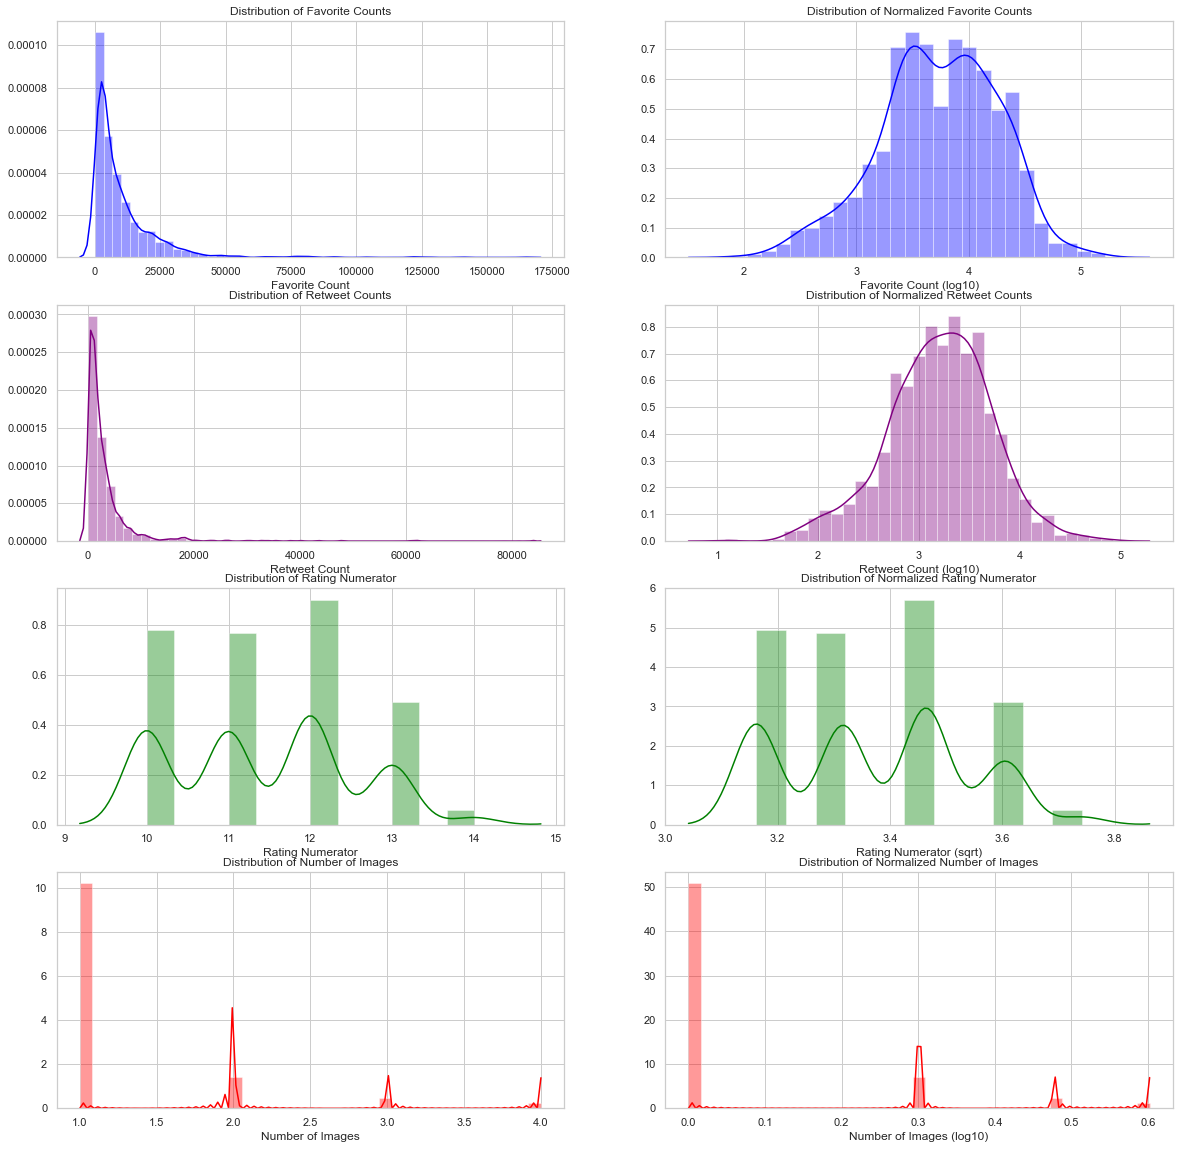

In [1605]:
# Output a matrix of values to assess skewness and normal distribution
fig, axes = plt.subplots(4, 2, figsize=(20,20), sharex=False)

axes[(0,0)].set_title("Distribution of Favorite Counts")
sns.distplot(df_tweets_clean.favorite_count, hist=True, norm_hist=True,
             color = 'blue', ax=axes[(0,0)], axlabel='Favorite Count')
axes[(0,1)].set_title("Distribution of Normalized Favorite Counts")
sns.distplot(df_tweets_clean.favorite_count.apply(np.log10), hist=True, norm_hist=True,
             ax=axes[(0,1)], color = 'blue', axlabel='Favorite Count (log10)')
axes[(1,0)].set_title("Distribution of Retweet Counts")
sns.distplot(tuple(df_tweets_clean.retweet_count), hist=True, norm_hist=True,
             color = 'purple', ax=axes[(1,0)], axlabel='Retweet Count')
axes[(1,1)].set_title("Distribution of Normalized Retweet Counts")
sns.distplot(tuple(df_tweets_clean.retweet_count.apply(np.log10)), hist=True, norm_hist=True,
             ax=axes[(1,1)], color = 'purple', axlabel='Retweet Count (log10)')
axes[(2,0)].set_title("Distribution of Rating Numerator")
sns.distplot(tuple(df_tweets_clean.rating_numerator), hist=True, norm_hist=True,
             color = 'green', ax=axes[(2,0)], axlabel='Rating Numerator')
axes[(2,1)].set_title("Distribution of Normalized Rating Numerator")
sns.distplot(tuple(df_tweets_clean.rating_numerator.apply(np.sqrt)), hist=True, norm_hist=True,
             ax=axes[(2,1)], color = 'green', axlabel='Rating Numerator (sqrt)')
axes[(3,0)].set_title("Distribution of Number of Images")
sns.distplot(tuple(df_tweets_clean.img_num), hist=True, norm_hist=True,
             color = 'red', ax=axes[(3,0)], axlabel='Number of Images')
axes[(3,1)].set_title("Distribution of Normalized Number of Images")
sns.distplot(tuple(df_tweets_clean.img_num.apply(np.log10)), hist=True, norm_hist=True,
             ax=axes[(3,1)], color = 'red', axlabel='Number of Images (log10)')

fig.savefig('distribution_plots.png')

##### Insight 1 Summary
- Favorite Count, Retweet Count, and Rating Numerator are skewed to the left.
- Favorite Count and Retweet Count are normally distributed when adjusted for skewness.
- Rating numerator has been updated to remove outliers and only a few values.  Not a normal distribution.
- Most tweets have 1 image.

##### Insight 2

In [1593]:
# Subset the data variables of interest for charting
df_tweets_clean_subset = df_tweets_clean[
    df_tweets_clean.columns[df_tweets_clean.columns.
                            isin(['created_at', 'dog_breed', 'rating_numerator','favorite_count', 'retweet_count', 'img_num'])]]
df_tweets_clean_subset.reset_index()
df_tweets_clean_subset.head(1)

,rating_numerator,created_at,favorite_count,retweet_count,img_num,dog_breed
0,13.0,2017-08-01 00:17:27,32718,6171,1,Chihuahua


In [1594]:
# Group the subsetted dataframe by dog breed and output statistics for each variable of interest
chart = df_tweets_clean_subset.groupby(df_tweets_clean_subset['dog_breed']).agg(['count','median', 'mean', 'sum'])
chart

rating_numerator                           \
                                          count median       mean    sum   
dog_breed                                                                  
Afghan Hound                                  2   13.0  13.000000   26.0   
Airedale                                      9   11.0  11.000000   99.0   
American Staffordshire Terrier               14   11.0  11.214286  157.0   
Appenzeller                                   1   13.0  13.000000   13.0   
Australian Terrier                            2   11.5  11.500000   23.0   
Basenji                                       8   10.5  10.625000   85.0   
Basset                                       15   11.0  11.400000  171.0   
Beagle                                       15   11.0  10.800000  162.0   
Bedlington Terrier                            3   13.0  13.000000   39.0   
Bernese Mountain Dog                         11   12.0  11.272727  124.0   
Black And Tan Coonhound                       1   14.0  14.000000   14.0   
Blenheim Spaniel                              9   12.0  11.333333  102.0   
Bloodhound                                    5   12.0  11.800000   59.0   
Bluetick                                      3   12.0  11.333333   34.0   
Border Collie                                 9   12.0  11.666667  105.0   
Border Terrier                                7   12.0  12.142857   85.0   
Borzoi                                        7   11.0  11.571429   81.0   
Boston Bull                                   8   10.5  10.625000   85.0   
Bouvier Des Flandres                          1   13.0  13.000000   13.0   
Boxer                                         9   10.0  11.000000   99.0   
Brabancon Griffon                             3   10.0  10.000000   30.0   
Briard                                        3   12.0  12.333333   37.0   
Brittany Spaniel                              6   11.0  11.166667   67.0   
Bull Mastiff                                  4   10.5  10.750000   43.0   
Cairn                                         3   11.0  11.000000   33.0   
Cardigan                                     18   11.5  11.611111  209.0   
Chesapeake Bay Retriever                     26   11.0  11.230769  292.0   
Chihuahua                                    69   12.0  11.434783  789.0   
Chow                                         45   12.0  11.600000  522.0   
Cocker Spaniel                               28   12.0  11.500000  322.0   
...                                         ...    ...        ...    ...   
Pug                                          46   11.0  11.000000  506.0   
Redbone                                       4   11.0  11.000000   44.0   
Rhodesian Ridgeback                           3   11.0  11.000000   33.0   
Rottweiler                                   16   12.0  11.687500  187.0   
Saint Bernard                                 5   10.0  10.600000   53.0   
Saluki                                        4   13.0  12.500000   50.0   
Samoyed                                      41   12.0  11.804878  484.0   
Schipperke                                   11   11.0  11.363636  125.0   
Scottish Deerhound                            2   11.0  11.000000   22.0   
Shetland Sheepdog                            14   11.0  11.357143  159.0   
Shih Tzu                                     15   11.0  10.933333  164.0   
Siberian Husky                               18   11.5  11.444444  206.0   
Silky Terrier                                 1   12.0  12.000000   12.0   
Soft Coated Wheaten Terrier                   7   11.0  11.000000   77.0   
Staffordshire Bullterrier                    18   11.0  11.166667  201.0   
Standard Poodle                               8   11.0  11.375000   91.0   
Standard Schnauzer                            1   12.0  12.000000   12.0   
Sussex Spaniel                                2   11.0  11.000000   22.0   
Tibetan Mastiff                               4   12.0  12.250000   49.0   
Tib

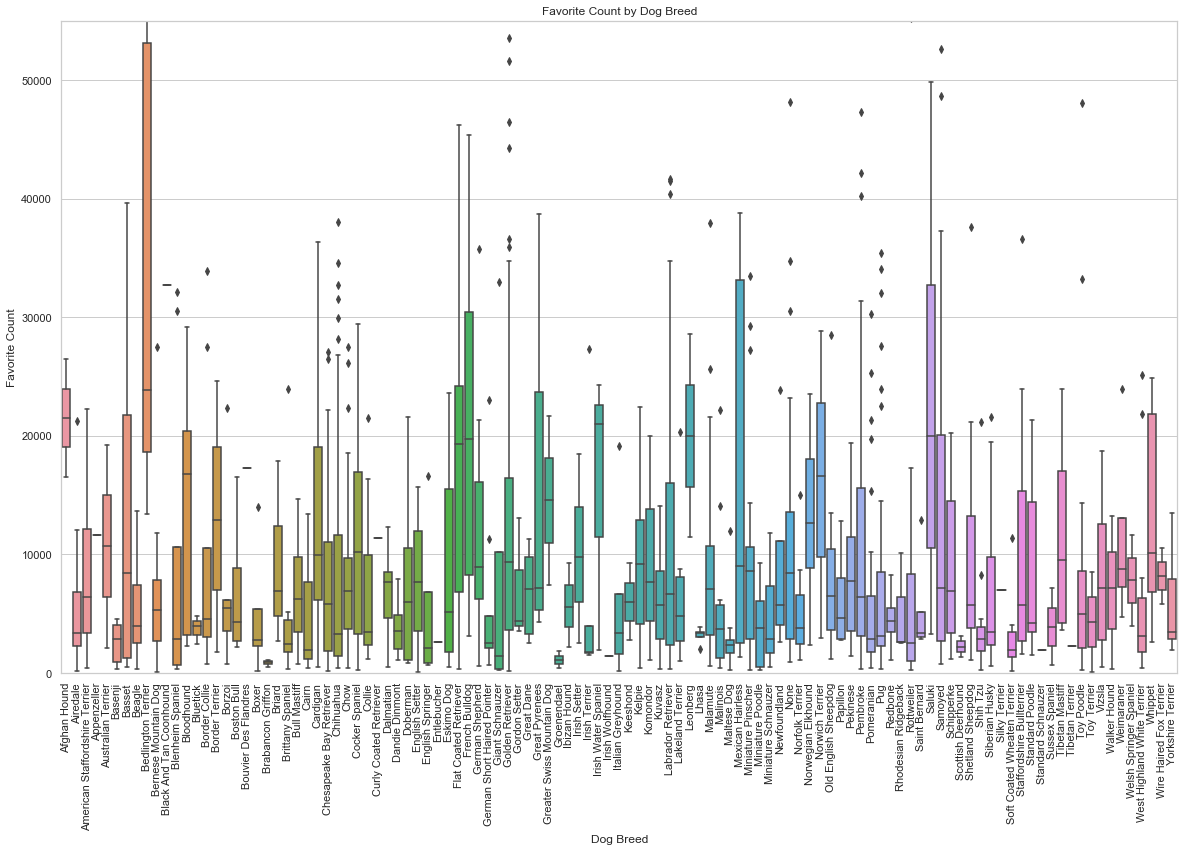

In [1595]:
# Plot a boxplot of dog breed by favorite count to assess statistics visually 
fig, axes = plt.subplots(figsize=(20,12))
sns.set(style="whitegrid")
axes.set_title("Favorite Count by Dog Breed")
axes = sns.boxplot(x="dog_breed", y=df_tweets_clean_subset.favorite_count, 
                   data=df_tweets_clean_subset, ax=axes)
axes.set(xlabel='Dog Breed', ylabel='Favorite Count')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set(ylim=(0, 55000))

# Save the file for inclusion in external reports
fig.savefig('DogBreedFavoriteCount.png')

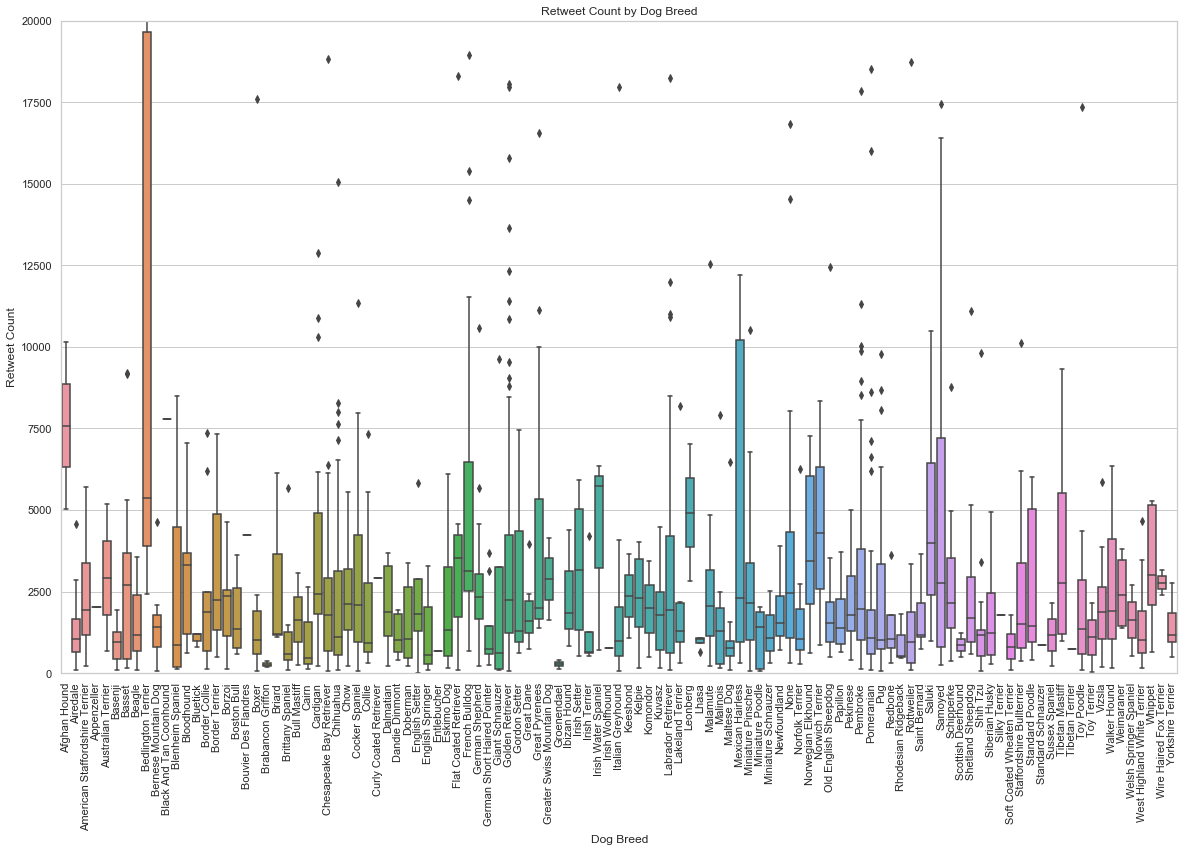

In [1596]:
# Plot a boxplot of dog breed by retweet count to assess statistics visually 
fig, axes = plt.subplots(figsize=(20,12))
sns.set(style="whitegrid")
axes.set_title("Retweet Count by Dog Breed")
axes = sns.boxplot(x="dog_breed", y=df_tweets_clean_subset.retweet_count, 
                   data=df_tweets_clean_subset, ax=axes)
axes.set(xlabel='Dog Breed', ylabel='Retweet Count')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set(ylim=(0, 20000))

# Save the file for inclusion in external reports
fig.savefig('DogBreedRetweetCount.png')

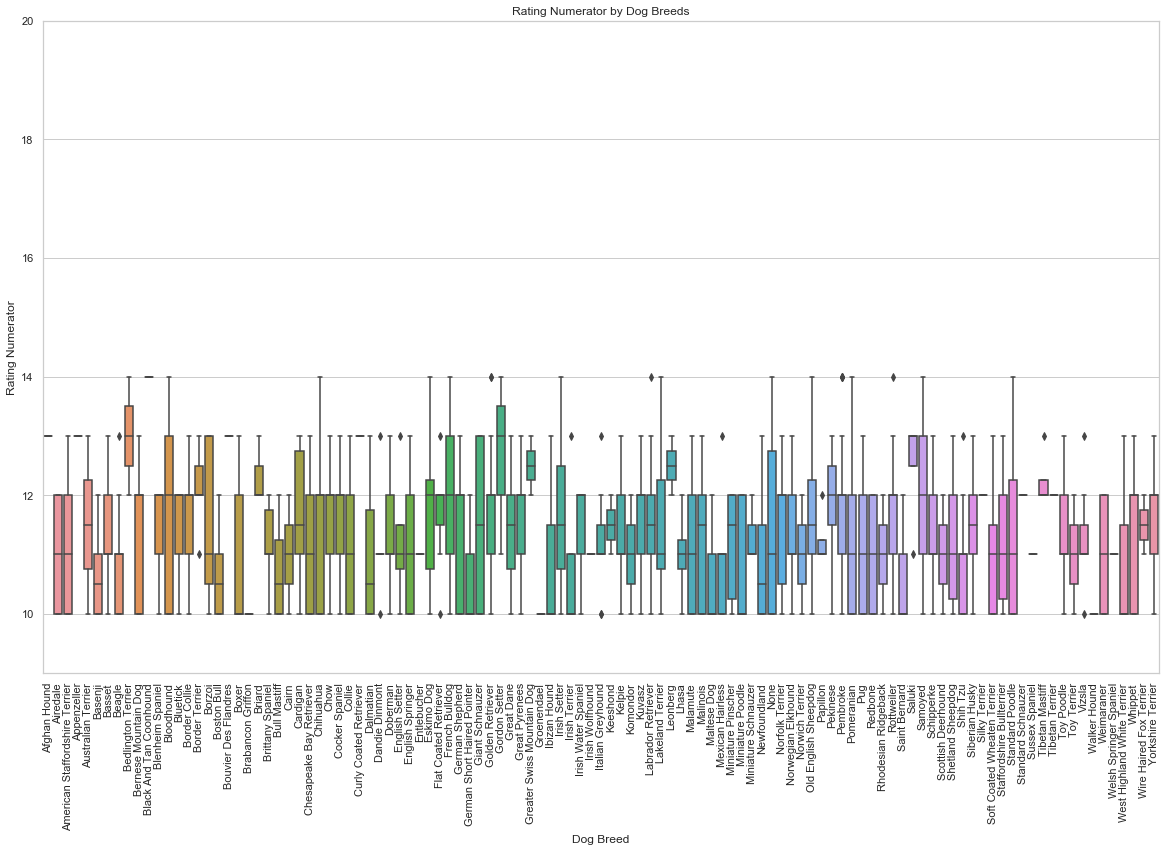

In [1597]:
# Plot a boxplot of dog breed by rating numerator to assess statistics visually 
fig, axes = plt.subplots(figsize=(20,12))
sns.set(style="whitegrid")
axes.set_title("Rating Numerator by Dog Breeds")
axes = sns.boxplot(x="dog_breed", y=df_tweets_clean_subset.rating_numerator, 
                   data=df_tweets_clean_subset, ax=axes)
axes.set(xlabel='Dog Breed', ylabel='Rating Numerator')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set(ylim=(9, 20))

# Save the file for inclusion in external reports
fig.savefig('DogBreedRatingNumerator.png')

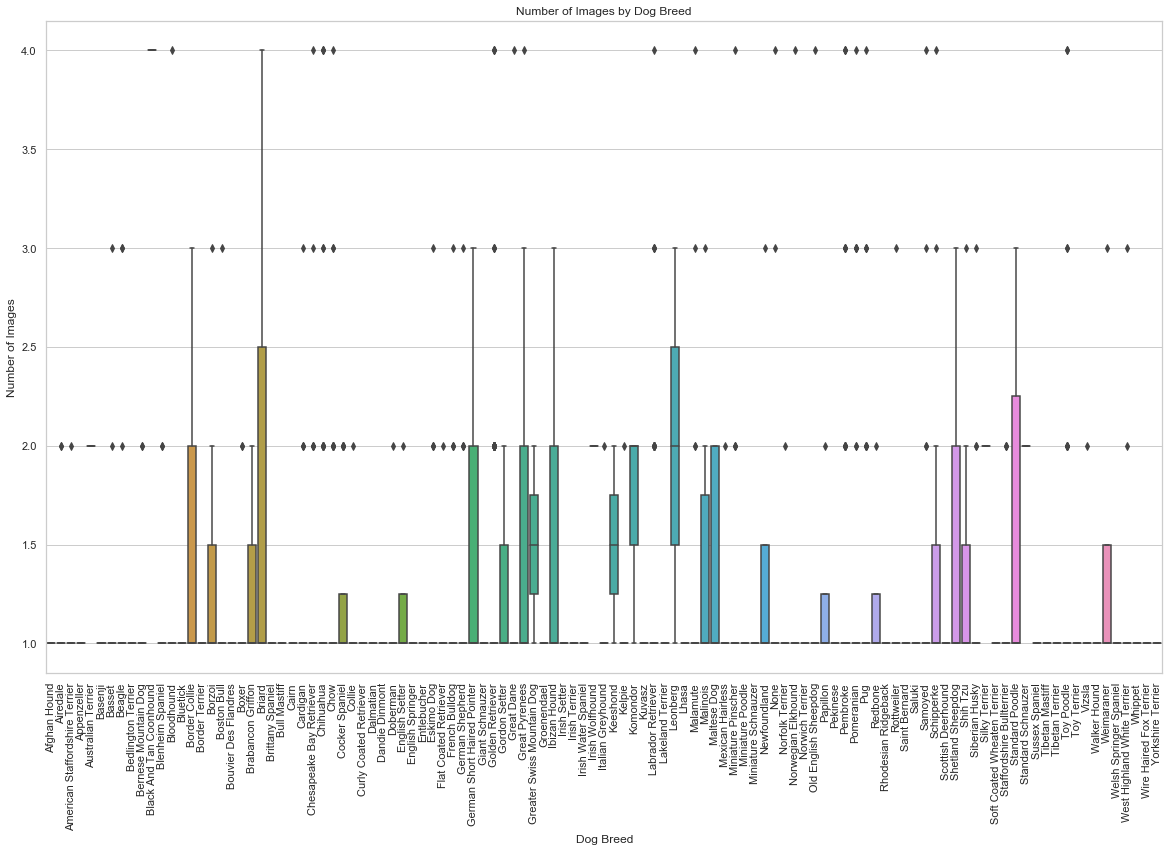

In [1598]:
# Plot a boxplot of dog breed by number of images to assess statistics visually 
fig, axes = plt.subplots(figsize=(20,12))
sns.set(style="whitegrid")
axes.set_title("Number of Images by Dog Breed")
axes = sns.boxplot(x="dog_breed", y=df_tweets_clean_subset.img_num, 
                   data=df_tweets_clean_subset, ax=axes)
axes.set(xlabel='Dog Breed', ylabel='Number of Images')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

# Save the file for inclusion in external reports
fig.savefig('DogBreedNumberImages.png')

##### Insight 2 Summary
- The highest median `favorite_count` by Dog Breed is for the *Bedlington Terrier* followed by the *Afghan Hound* and *Irish Water Spaniel*.
- The highest median `rating_numerator` was for the *Bedlington Terrier* and the next highest was for the *Gordon Setter* 
- The highest median `retweet_count` by Dog Breed is for the *Afghan Hound* followed by *Irish Water Spaniel*.
- Most Dog Breeds have one `img_num` in a tweet. This graph doesn't indicate the number of tweets per Dog Breed.

##### Insight 3

In [1599]:
# Group the subset of data by day of week for charting
df_tweets_clean_subset.groupby(df_tweets_clean_subset['created_at'].dt.weekday_name).agg(['count','median','mean','sum'])

rating_numerator                           favorite_count          \
                      count median       mean     sum          count  median   
created_at                                                                     
Friday                  211   12.0  11.469194  2420.0            211  5665.0   
Monday                  232   11.0  11.349138  2633.0            232  6401.5   
Saturday                177   11.0  11.412429  2020.0            177  4376.0   
Sunday                  177   11.0  11.406780  2019.0            177  5520.0   
Thursday                210   11.0  11.414286  2397.0            210  4653.0   
Tuesday                 208   12.0  11.567308  2406.0            208  7176.0   
Wednesday               205   11.0  11.370732  2331.0            205  6020.0   

                                  retweet_count                               \
                    mean      sum         count  median         mean     sum   
created_at                                                                     
Friday       9769.758294  2061419           211  1670.0  2939.516588  620238   
Monday      10203.357759  2367179           232  1685.5  3028.814655  702685   
Saturday    10520.016949  1862043           177  1429.0  3431.621469  607397   
Sunday      10534.542373  1864614           177  1804.0  3049.276836  539722   
Thursday     9463.242857  1987281           210  1581.0  2717.866667  570752   
Tuesday     10881.567308  2263366           208  2126.5  3146.461538  654464   
Wednesday   11442.809756  2345776           205  1819.0  3425.229268  702172   

           img_num                        
             count median      mean  sum  
created_at                                
Friday         211      1  1.255924  265  
Monday         232      1  1.241379  288  
Saturday       177      1  1.214689  215  
Sunday         177      1  1.242938  220  
Thursday       210      1  1.223810  257  
Tuesday        208      1  1.240385  258  
Wednesday      205      1  1.317073  270

In [1600]:
# Output stats for each variable
df_tweets_clean_subset.groupby(df_tweets_clean_subset['created_at'].dt.weekday_name).describe()

rating_numerator                                               \
                      count       mean       std   min   25%   50%   75%   
created_at                                                                 
Friday                211.0  11.469194  1.105290  10.0  10.5  12.0  12.0   
Monday                232.0  11.349138  1.098444  10.0  10.0  11.0  12.0   
Saturday              177.0  11.412429  1.073685  10.0  10.0  11.0  12.0   
Sunday                177.0  11.406780  1.149881  10.0  10.0  11.0  12.0   
Thursday              210.0  11.414286  1.069269  10.0  11.0  11.0  12.0   
Tuesday               208.0  11.567308  1.105668  10.0  11.0  12.0  12.0   
Wednesday             205.0  11.370732  1.102191  10.0  10.0  11.0  12.0   

                 favorite_count                                              \
             max          count          mean           std    min      25%   
created_at                                                                    
Friday      14.0          211.0   9769.758294  12756.658782  292.0  2618.00   
Monday      14.0          232.0  10203.357759  13968.781565   80.0  2359.00   
Saturday    14.0          177.0  10520.016949  19675.864704  215.0  2450.00   
Sunday      14.0          177.0  10534.542373  13443.589165  250.0  2327.00   
Thursday    14.0          210.0   9463.242857  11747.409128  222.0  2521.25   
Tuesday     14.0          208.0  10881.567308  11915.193536  124.0  2892.50   
Wednesday   14.0          205.0  11442.809756  14580.675478  185.0  2455.00   

                                       retweet_count               \
               50%       75%       max         count         mean   
created_at                                                          
Friday      5665.0  12455.50  127369.0         211.0  2939.516588   
Monday      6401.5  12999.00  122262.0         232.0  3028.814655   
Saturday    4376.0  11052.00  164690.0         177.0  3431.621469   
Sunday      5520.0  13372.00   82490.0         177.0  3049.276836   
Thursday    4653.0  11993.75   82129.0         210.0  2717.866667   
Tuesday     7176.0  13969.25   90835.0         208.0  3146.461538   
Wednesday   6020.0  14593.00   92170.0         205.0  3425.229268   

                                                                img_num  \
                    std   min     25%     50%      75%      max   count   
created_at                                                                
Friday      5159.551527  63.0  829.50  1670.0  3314.00  61159.0   211.0   
Monday      4893.323584  12.0  754.25  1685.5  3518.25  43524.0   232.0   
Saturday    8882.431277  58.0  743.00  1429.0  3120.00  83925.0   177.0   
Sunday      4359.303947  57.0  610.00  1804.0  3388.00  33904.0   177.0   
Thursday    3554.070905  62.0  770.50  1581.0  3430.00  26178.0   210.0   
Tuesday     3681.012907  45.0  843.00  2126.5  3971.50  30906.0   208.0   
Wednesday   5226.404765  51.0  700.00  1819.0  4170.00  40168.0   205.0   

                                                         
                mean       std  min  25%  50%  75%  max  
created_at                                               
Friday      1.255924  0.594339  1.0  1.0  1.0  1.0  4.0  
Monday      1.241379  0.618904  1.0  1.0  1.0  1.0  4.0  
Saturday    1.214689  0.532158  1.0  1.0  1.0  1.0  4.0  
Sunday      1.242938  0.605625  1.0  1.0  1.0  1.0  4.0  
Thursday    1.223810  0.596966  1.0  1.0  1.0  1.0  4.0  
Tuesday     1.240385  0.564577  1.0  1.0  1.0  1.0  4.0  
Wednesday   1.317073  0.768211  1.0  1.0  1.0  1.0  4.0

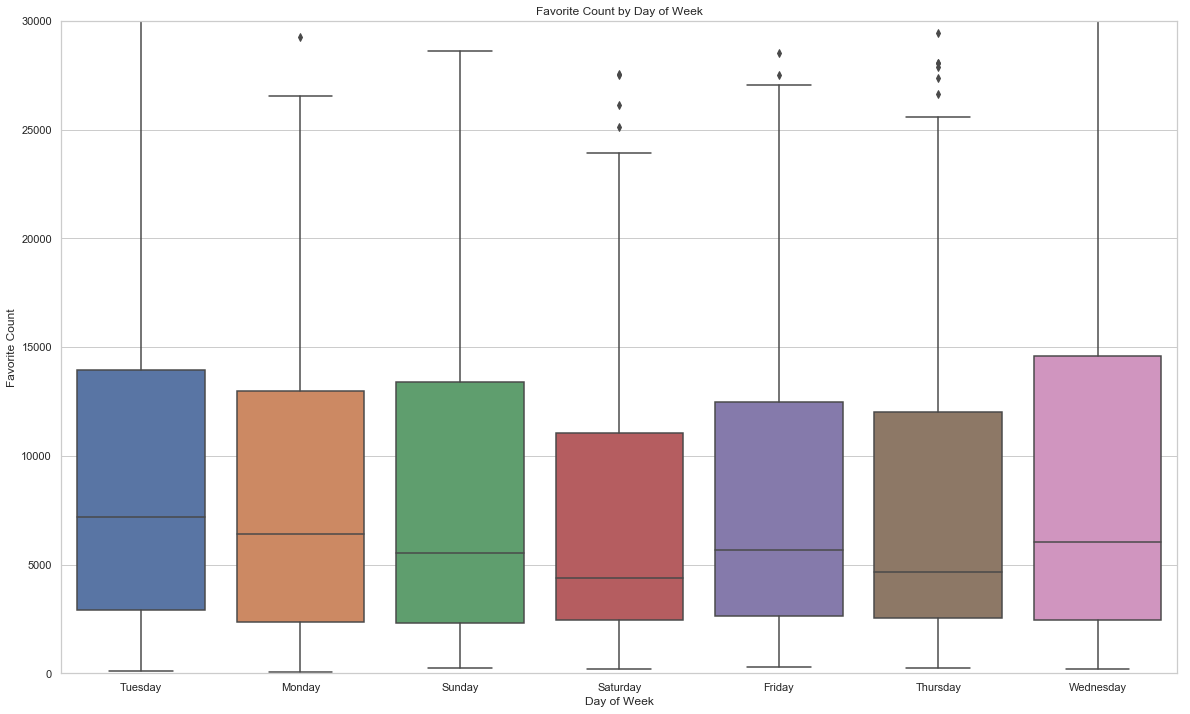

In [1601]:
# Plot the favorite count by day of week
fig, axes = plt.subplots(figsize=(20,12))
sns.set(style="whitegrid")
axes.set_title("Favorite Count by Day of Week")
axes = sns.boxplot(x=df_tweets_clean_subset['created_at'].dt.weekday_name, 
                   y=df_tweets_clean_subset.favorite_count, 
                   data=df_tweets_clean_subset, ax=axes)
axes.set(xlabel='Day of Week', ylabel='Favorite Count')
axes.set(ylim=(0, 30000))

# Save the file for inclusion in external reports
fig.savefig('DayofWeekFavoriteCount.png')

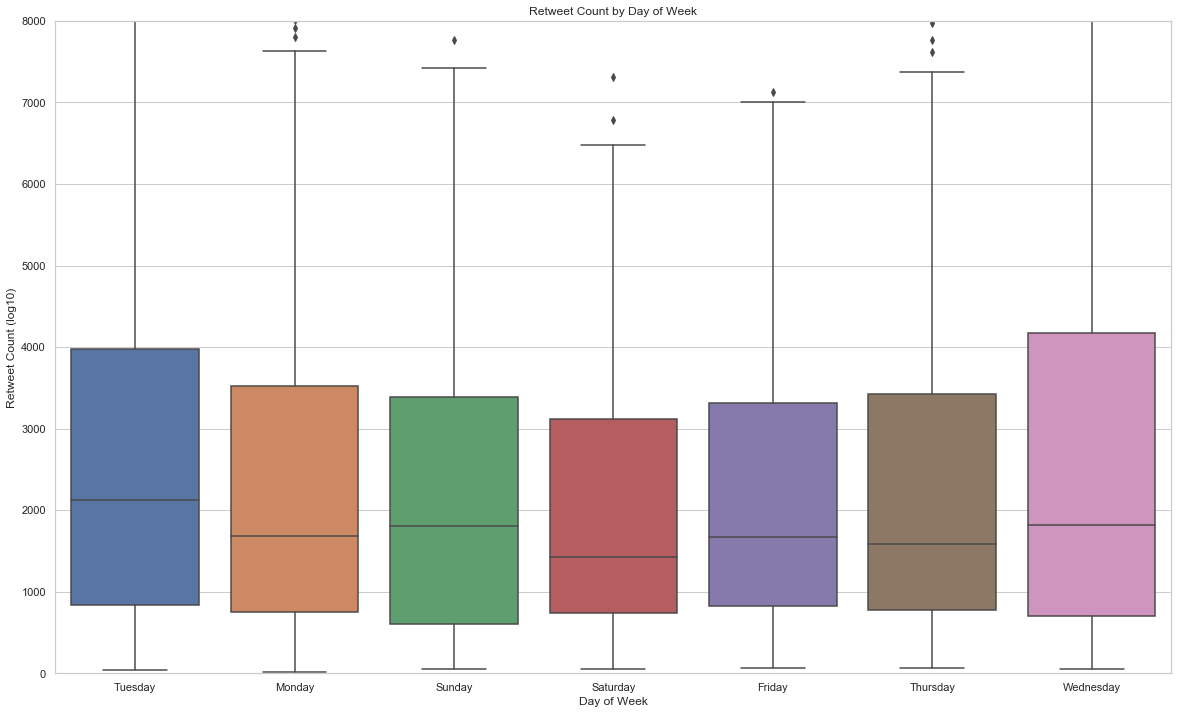

In [1602]:
# Plot the retweet count by day of week
fig, axes = plt.subplots(figsize=(20,12))
sns.set(style="whitegrid")
axes.set_title("Retweet Count by Day of Week")
axes = sns.boxplot(x=df_tweets_clean_subset['created_at'].dt.weekday_name, 
                   y=df_tweets_clean_subset.retweet_count, 
                   data=df_tweets_clean_subset, ax=axes)
axes.set(xlabel='Day of Week', ylabel='Retweet Count (log10)')
axes.set(ylim=(0, 8000))

# Save the plot to a file for inclusion in external reports
fig.savefig('DayofWeekRetweetCount.png')

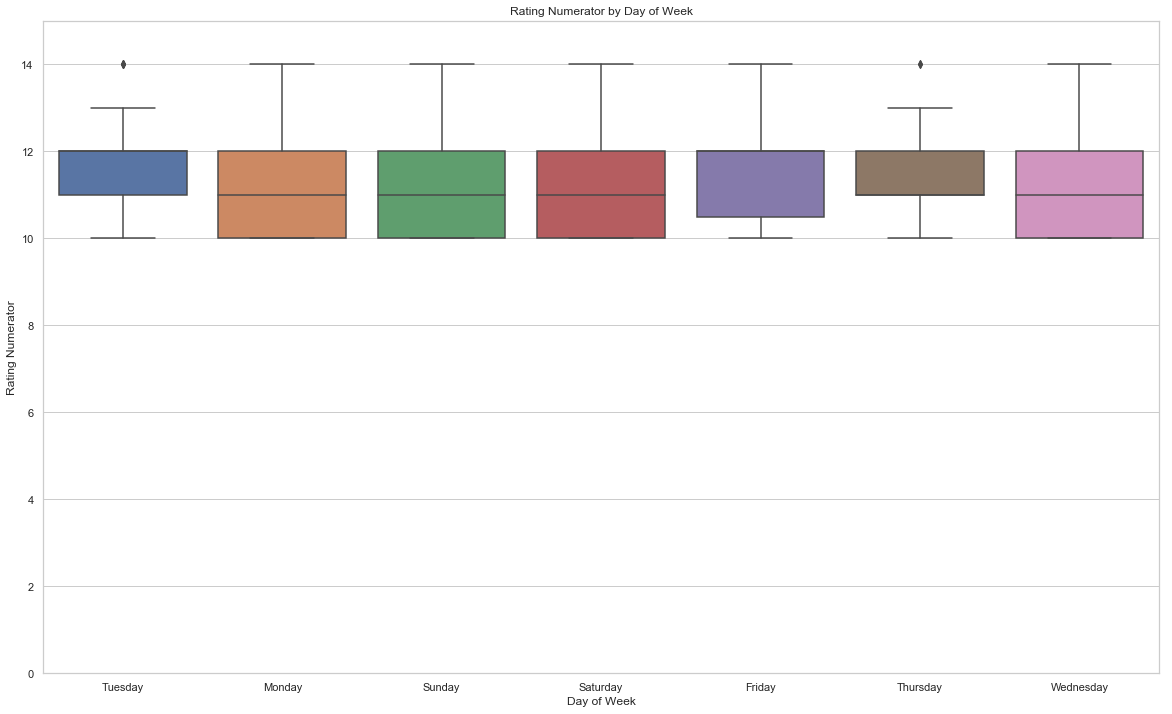

In [1603]:
# Plot the rating numerator by day of week
fig, axes = plt.subplots(figsize=(20,12))
sns.set(style="whitegrid")
axes.set_title("Rating Numerator by Day of Week")
axes = sns.boxplot(x=df_tweets_clean_subset['created_at'].dt.weekday_name, 
                   y=df_tweets_clean_subset.rating_numerator, 
                   data=df_tweets_clean_subset, ax=axes)
axes.set(xlabel='Day of Week', ylabel='Rating Numerator')
axes.set(ylim=(0, 15))

# Save the plot to a file for inclusion in external reports
fig.savefig('DayofWeekRatingNumerator.png')

##### Insight 3 Summary
- The median `favorite_count` is higher on *Monday, Tuesday and Wednesday*.
- The median `retweet_count` is also higher on *Tuesday and Wednesday*.
- *Sundays* are lowest 25th percentile for `retweet_count` and `favorite_count`.
- The `rating_numerator` median is higher on *Tuesday and Friday*.

##### Insight 4

In [1604]:
# Assess the correlation calculation on the subset dataframe
df_tweets_clean_subset.corr()

,rating_numerator,favorite_count,retweet_count,img_num
rating_numerator,1.000000,0.459661,0.342759,0.171825
favorite_count,0.459661,1.000000,0.930665,0.093049
retweet_count,0.342759,0.930665,1.000000,0.074129
img_num,0.171825,0.093049,0.074129,1.000000


##### Insight 4 Summary
- `Favorite Count` and `Retweet Count` have a strong positive correlation.  
- The `rating_numerator` is moderately correlated to `favorite_count` and `retweet_count`.
- The img_num has very low to no correlation.